In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import svm

In [2]:
df = pd.read_csv('../data_acquisition/target.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,target
0,5008804,1,1,1,0,427500.0,4,1,0,4,...,-4542,1,1,0,0,17,2.0,0,6,0
1,5008805,1,1,1,0,427500.0,4,1,0,4,...,-4542,1,1,0,0,17,2.0,0,6,0
2,5008806,1,1,1,0,112500.0,4,4,1,1,...,-1134,1,0,0,0,16,2.0,0,6,0
3,5008808,0,0,1,0,270000.0,0,4,3,1,...,-3051,1,0,1,1,14,1.0,0,0,0
4,5008809,0,0,1,0,270000.0,0,4,3,1,...,-3051,1,0,1,1,14,1.0,-22,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,1,1,1,0,315000.0,4,4,1,1,...,-2420,1,0,0,0,10,2.0,0,5,1
36453,5149834,0,0,1,0,157500.0,0,1,1,1,...,-1325,1,0,1,1,11,2.0,0,6,0
36454,5149838,0,0,1,0,157500.0,1,1,1,1,...,-1325,1,0,1,1,11,2.0,0,6,0
36455,5150049,0,0,1,0,283500.0,4,4,1,1,...,-655,1,0,0,0,14,2.0,0,2,1


In [3]:
Y = df['target']
X = df.drop(columns=['ID','target','MONTHS_BALANCE','STATUS'])

In [4]:
print(Y.value_counts(normalize=True)) ##Dataset muy desbalanceado

target
0    0.997092
1    0.002908
Name: proportion, dtype: float64


In [5]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42) # Aplicar SMOTE para balancear las clases
X_balanced, Y_balanced = smote.fit_resample(X, Y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced,Y_balanced, 
                                                    stratify=Y_balanced, test_size=0.3,
                                                    random_state = 10086)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


linear_model = LinearRegression()

linear_model.fit(X_train, y_train)


y_predict = linear_model.predict(X_test)

# Redondear predicciones para compararlas como clasificación
y_predict = (y_pred_linear >= 0.5).astype(int)

# Evaluar el modelo
print("\nMean Squared Error (Linear Regression):", mean_squared_error(y_test, y_pred_linear))
print("Accuracy (Linear Regression): {:.5}".format(accuracy_score(y_test, y_pred_linear_rounded)))



Mean Squared Error (Linear Regression): 0.18468971859785835
Accuracy (Linear Regression): 0.74219


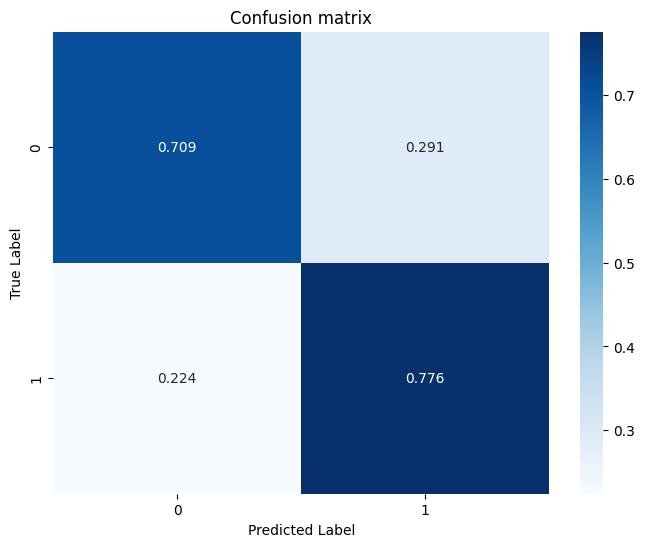

In [14]:
cm = confusion_matrix(y_test, y_predict)
class_names=['0','1']
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".3f", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()